In [18]:
from bfdc import drift, iotools
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
zt = iotools.open_csv_table('/Volumes/Imod-grenier/Andrey/data/2018/0820-tub-U2OS0813/FOV1/sr_ast_LEDskip9_1/sr_ast_LEDskip9_1_MMStack_Pos0.ome_locs_filter_zola.csv')

In [21]:
dr = iotools.open_csv_table('/Volumes/Imod-grenier/Andrey/data/2018/0820-tub-U2OS0813/FOV1/sr_ast_LEDskip9_1/BFCC_table.csv')

In [22]:
#invert drift z
dr_inv = dr.copy()

dr_inv[:,3] = -1 * dr[:,3]



In [23]:
zt_inv = zt.copy()
zt_inv[:,4] = zt_inv[:,4] * -1

In [31]:
zt_dc, dr_int = drift.apply_drift(zt_inv,dr,smooth=10,skip=0,start=0)

Frame number for zola/bf_DC : 29989/26601
Truncating ZOLA table to 26601 frames
New frame number: 26599


In [25]:
def plot_drift(dr):
    plt.plot(dr[:,0],dr[:,1],label='x')
    plt.plot(dr[:,0],dr[:,2],label='y')
    plt.plot(dr[:,0],dr[:,3],label='z')
    plt.legend()


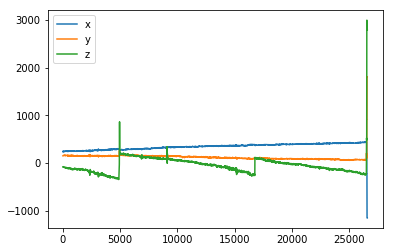

In [26]:
plot_drift(dr)

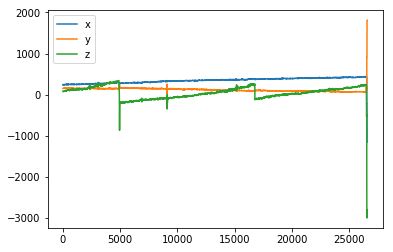

In [27]:
plot_drift(dr_inv)


In [32]:
iotools.save_zola_table(zt_dc,'/Volumes/Imod-grenier/Andrey/data/2018/0820-tub-U2OS0813/FOV1/sr_ast_LEDskip9_1/ZOLA_tableInv_BFDC_smooth10.csv')

In [19]:
import inspect

In [23]:
print(inspect.getsource(iotools.save_zola_table))


def save_zola_table(table, path):
    header = 'id,frame,x [nm],y [nm],z [nm],intensity,background,chi2,crlbX,crlbY,crlbZ,driftX,driftY,driftZ,' \
             'occurrenceMerging '
    np.savetxt(path, table[:,:15], fmt='%.2f', delimiter=',', comments='', newline='\r\n', header=header)

